In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_2015 = pd.read_csv('data/2015.csv')
data_2016 = pd.read_csv('data/2016.csv')
data_2017 = pd.read_csv('data/2017.csv')
data_2018 = pd.read_csv('data/2018.csv')
data_2019 = pd.read_csv('data/2019.csv')

data_2015.columns = data_2015.columns.str.replace(" ",'_')
data_2016.columns = data_2016.columns.str.replace(" ",'_')
data_2017.columns = data_2017.columns.str.replace(" ",'_')
data_2018.columns = data_2018.columns.str.replace(" ",'_')
data_2019.columns = data_2019.columns.str.replace(" ",'_')

data_2015.columns = data_2015.columns.str.lower()
data_2016.columns = data_2016.columns.str.lower()
data_2017.columns = data_2017.columns.str.lower()
data_2018.columns = data_2018.columns.str.lower()
data_2019.columns = data_2019.columns.str.lower()

data_2015 = data_2015.rename(columns={'economy_(gdp_per_capita)':'economy', 
                                      'health_(life_expectancy)':'health', 
                                      'trust_(government_corruption)':'trust'})
data_2016 = data_2016.rename(columns={'economy_(gdp_per_capita)':'economy',
                                        'health_(life_expectancy)':'health',    
                                        'trust_(government_corruption)':'trust'})
data_2017 = data_2017.rename(columns={'economy..gdp.per.capita.':'economy',
                                        'happiness.score':'happiness_score',
                                        'health..life.expectancy.':'health',
                                        'trust..government.corruption.':'trust'})   
data_2018 = data_2018.rename(columns={'country_or_region':'country',
                                        'score':'happiness_score',
                                        'gdp_per_capita':'economy',
                                        'social_support':'family',
                                        'healthy_life_expectancy':'health',
                                        'freedom_to_make_life_choices':'freedom',
                                        'generosity':'generosity',
                                        'perceptions_of_corruption':'trust'})
data_2019 = data_2019.rename(columns={'country_or_region':'country',
                                        'score':'happiness_score',
                                        'gdp_per_capita':'economy',
                                        'social_support':'family',
                                        'healthy_life_expectancy':'health',
                                        'freedom_to_make_life_choices':'freedom',
                                        'generosity':'generosity',
                                        'perceptions_of_corruption':'trust'})
                                        

In [4]:
data_2015.head(1)


,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [5]:
data_2016.head(1)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [6]:
data_2017.head(1)

,country,happiness.rank,happiness_score,whisker.high,whisker.low,economy,family,health,freedom,generosity,trust,dystopia.residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [7]:
data_2018.head(1)

,overall_rank,country,happiness_score,economy,family,health,freedom,generosity,trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [8]:
data_2019.head(1)

,overall_rank,country,happiness_score,economy,family,health,freedom,generosity,trust
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [9]:
def scatter_yr(x: str, y: str):
    fig, axis = plt.subplots(1, 5, figsize=(20, 5))

    axis[0].scatter(data_2015[x], data_2015[y])
    axis[0].set_title(f'2015, ({np.corrcoef(data_2015[x], data_2015[y])[0, 1]:.2f})')

    axis[1].scatter(data_2016[x], data_2016[y])
    axis[1].set_title(f'2016, ({np.corrcoef(data_2016[x], data_2016[y])[0, 1]:.2f})')

    axis[2].scatter(data_2017[x], data_2017[y])
    axis[2].set_title(f'2017, ({np.corrcoef(data_2017[x], data_2017[y])[0, 1]:.2f})')

    axis[3].scatter(data_2018[x], data_2018[y])
    axis[3].set_title(f'2018, ({np.corrcoef(data_2018[x], data_2018[y])[0, 1]:.2f})')

    axis[4].scatter(data_2019[x], data_2019[y])
    axis[4].set_title(f'2019, ({np.corrcoef(data_2019[x], data_2019[y])[0, 1]:.2f})')

    limit = max(data_2015[y].max(), data_2016[y].max(), data_2017[y].max(), data_2018[y].max(), data_2019[y].max())*1.05
    axis[0].set_ylim(0, limit)
    axis[1].set_ylim(0, limit)
    axis[2].set_ylim(0, limit)
    axis[3].set_ylim(0, limit)
    axis[4].set_ylim(0, limit)

    fig.suptitle(y.capitalize())
    plt.show()

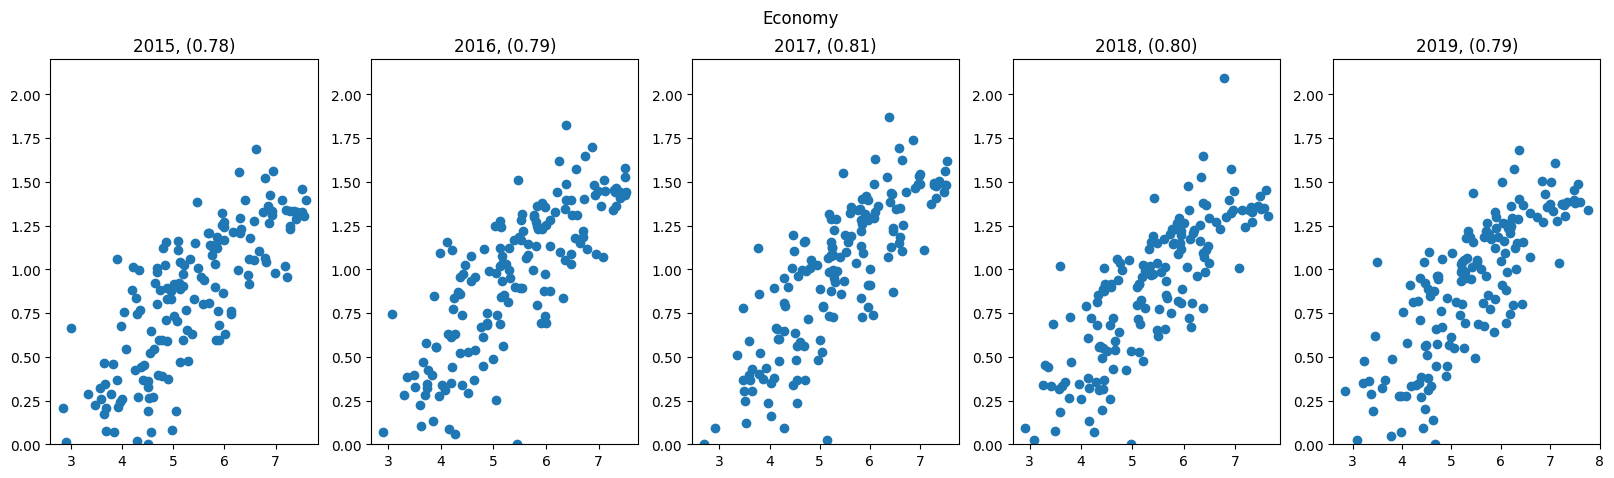

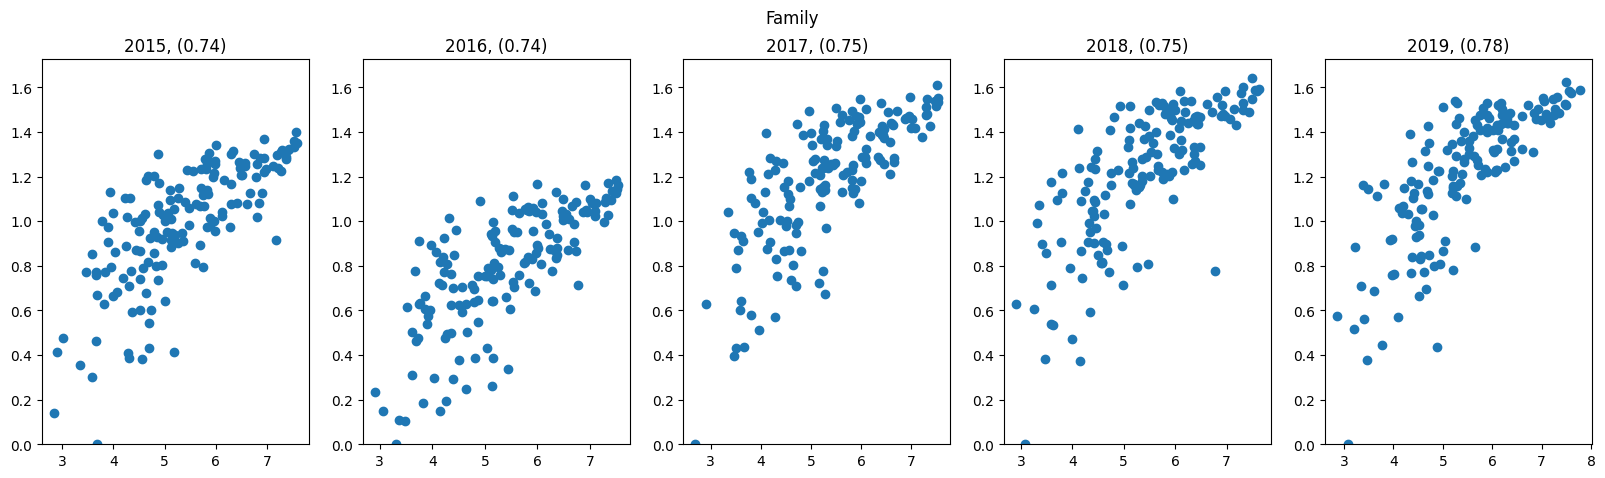

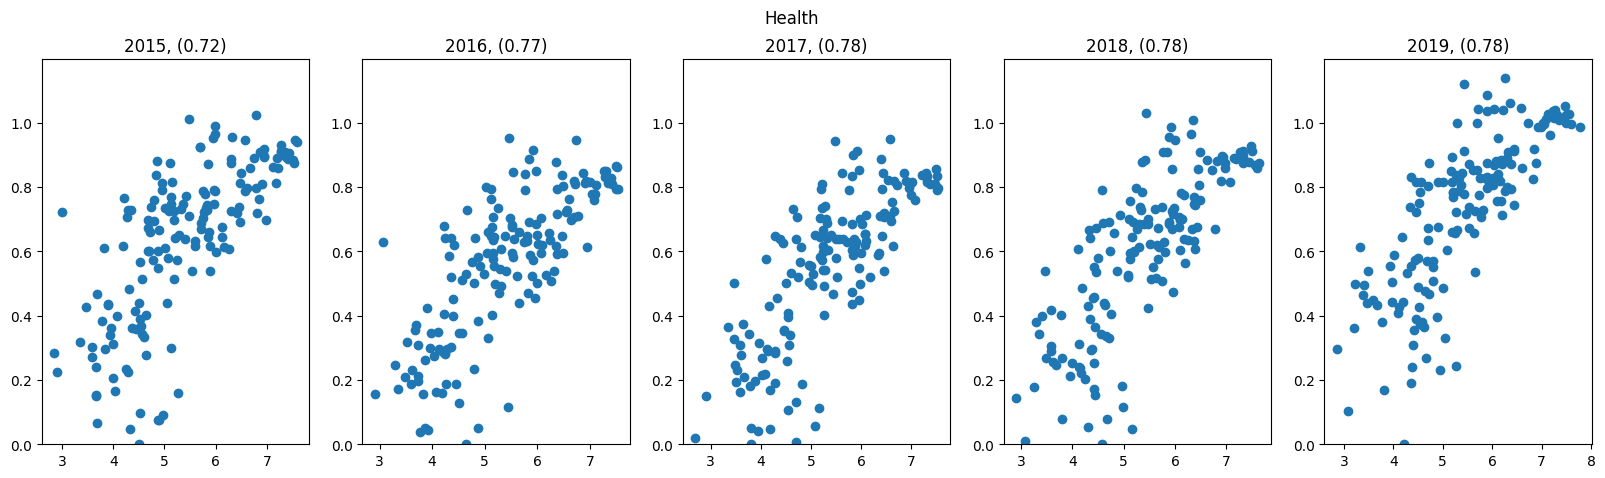

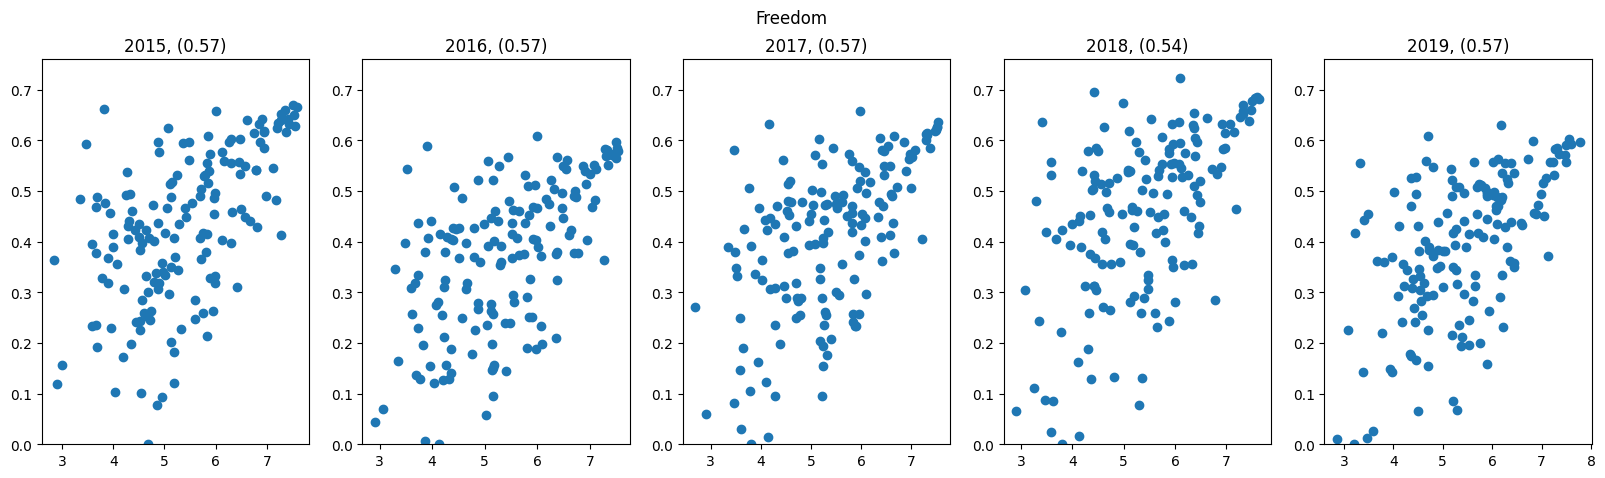

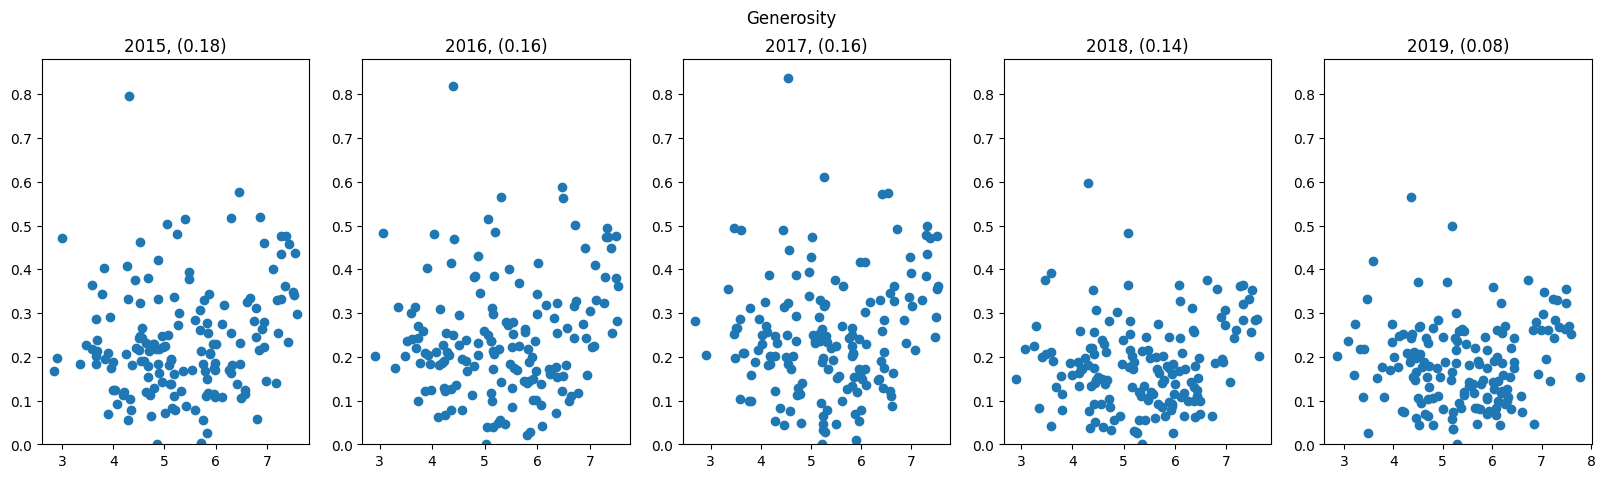

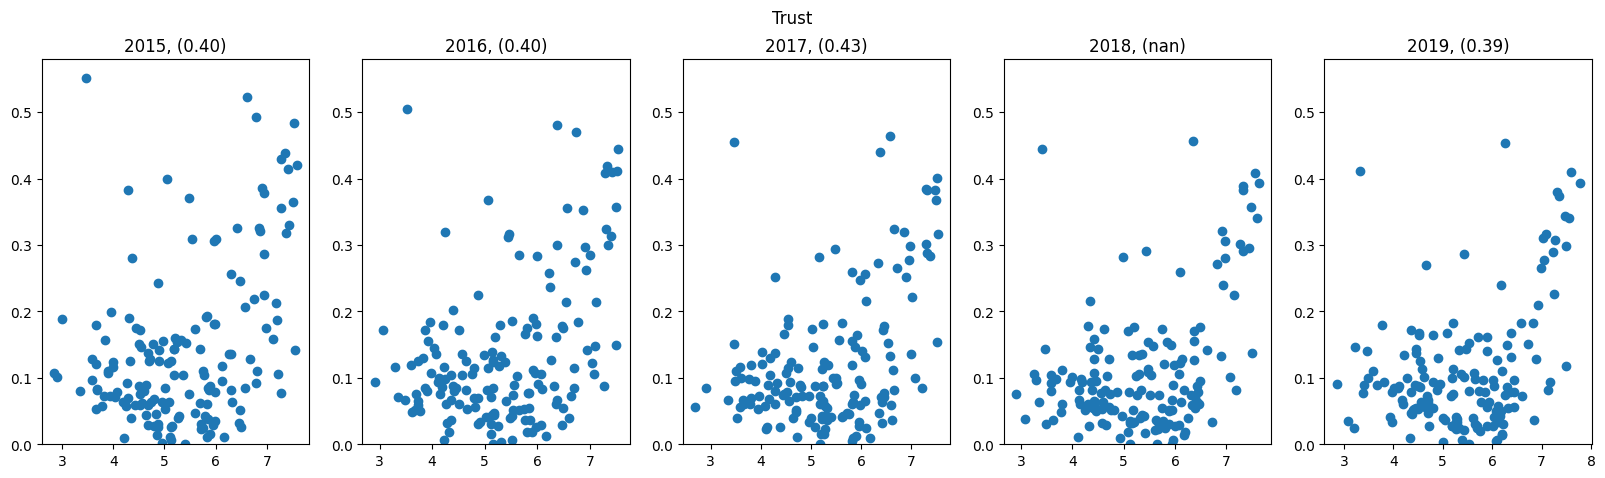

In [10]:
columns = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']

for column in columns:
    scatter_yr('happiness_score', column)

There's no linear correlation as most of coefficients are less than 0.8

However, economy, family and health are the most important factors to happiness score.


Let's explore correlation between economy and health

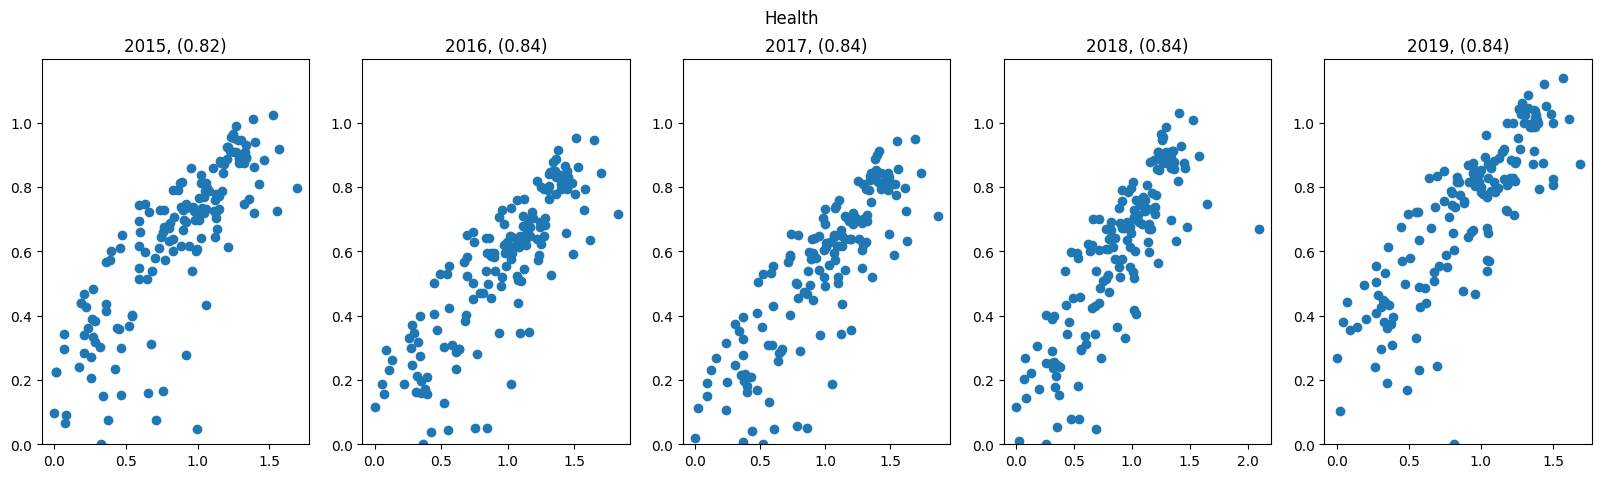

In [11]:
scatter_yr('economy', 'health')

Not surprisingly, there's a linear correlation between economy and health. The correlation coefficient is 0.83.

Let's create criteria that is sum of economy, family and health

In [12]:
data_2015['sum_crit'] = data_2015.economy + data_2015.family + data_2015.health
data_2016['sum_crit'] = data_2016.economy + data_2016.family + data_2016.health
data_2017['sum_crit'] = data_2017.economy + data_2017.family + data_2017.health
data_2018['sum_crit'] = data_2018.economy + data_2018.family + data_2018.health
data_2019['sum_crit'] = data_2019.economy + data_2019.family + data_2019.health


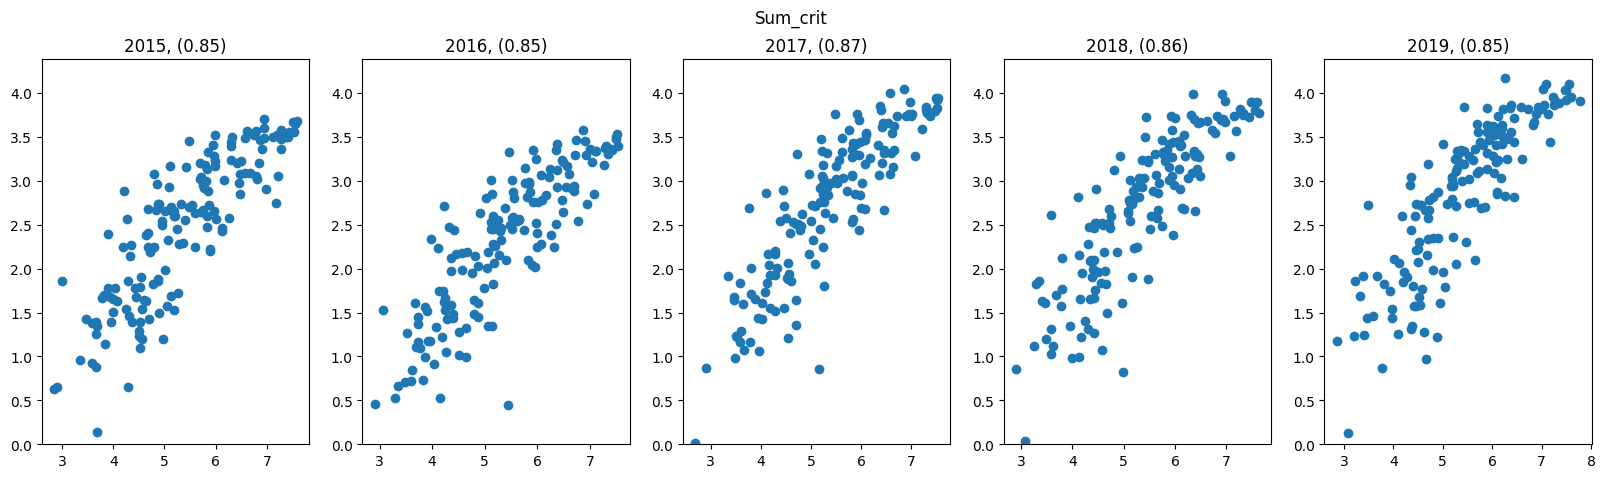

In [13]:
scatter_yr('happiness_score', 'sum_crit')

There's even stronger linear correlation between criteria and happiness score. The correlation coefficient is 0.86

In [14]:
cls_2015 = data_2015[[ 'happiness_score', 'sum_crit']]
cls_2016 = data_2016[[ 'happiness_score', 'sum_crit']]
cls_2017 = data_2017[[ 'happiness_score', 'sum_crit']]
cls_2018 = data_2018[[ 'happiness_score', 'sum_crit']]
cls_2019 = data_2019[[ 'happiness_score', 'sum_crit']]

I'm going to cluster countries by criteria and happiness score using KMeans

I'm going to use 3 clusters (first world, second world and third world countries)

And compare it with the real world data

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans_2015 = KMeans(n_clusters=3, random_state=0).fit(cls_2015)
kmeans_2016 = KMeans(n_clusters=3, random_state=0).fit(cls_2016)
kmeans_2017 = KMeans(n_clusters=3, random_state=0).fit(cls_2017)
kmeans_2018 = KMeans(n_clusters=3, random_state=0).fit(cls_2018)
kmeans_2019 = KMeans(n_clusters=3, random_state=0).fit(cls_2019)


c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\clust

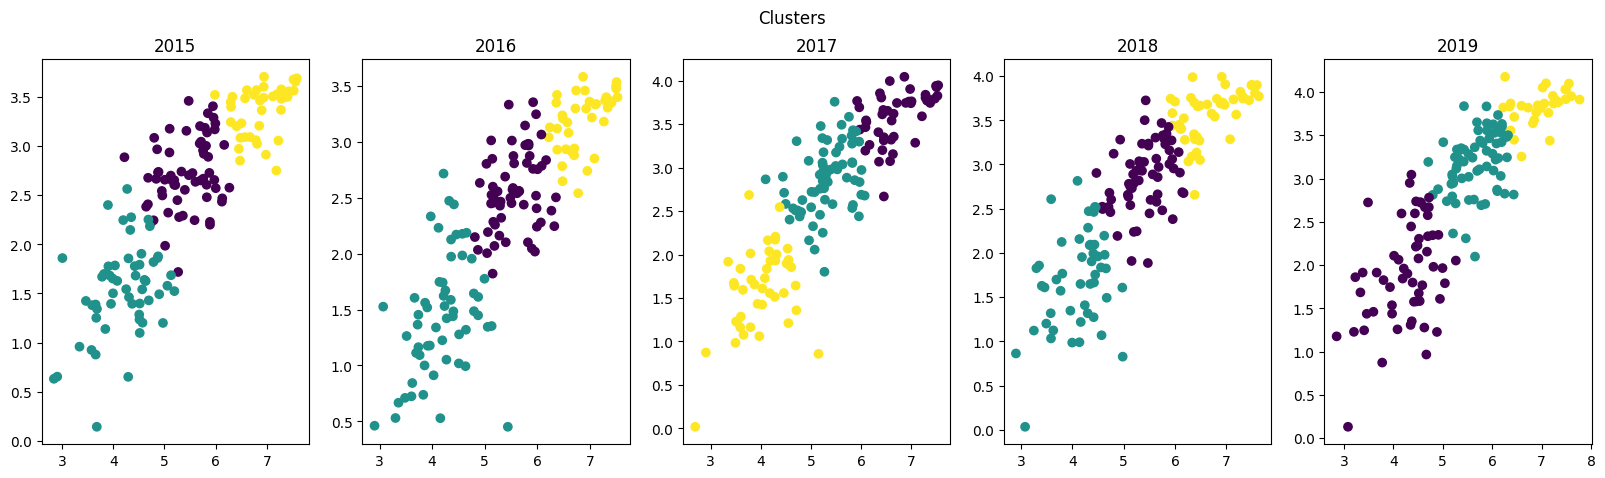

In [17]:
fig, axis = plt.subplots(1, 5, figsize=(20, 5))

axis[0].scatter(cls_2015.happiness_score, cls_2015.sum_crit, c=kmeans_2015.labels_)
axis[0].set_title('2015')

axis[1].scatter(cls_2016.happiness_score, cls_2016.sum_crit, c=kmeans_2016.labels_)
axis[1].set_title('2016')

axis[2].scatter(cls_2017.happiness_score, cls_2017.sum_crit, c=kmeans_2017.labels_)
axis[2].set_title('2017')

axis[3].scatter(cls_2018.happiness_score, cls_2018.sum_crit, c=kmeans_2018.labels_)
axis[3].set_title('2018')

axis[4].scatter(cls_2019.happiness_score, cls_2019.sum_crit, c=kmeans_2019.labels_)
axis[4].set_title('2019')

fig.suptitle('Clusters')
plt.show()


Let's try PCA to reduce dimensionality

In [45]:
from sklearn.decomposition import PCA
data = [data_2015, data_2016, data_2017, data_2018, data_2019]
columns = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
for i in range(5):
    df = data[i]
    df = df.dropna()
    pca = PCA(n_components=1)
    pca.fit(df[columns])
    df.loc[:, 'pca1'] = pca.transform(df[columns])[:, 0]
    #df.loc[:, 'pca2'] = pca.transform(df[columns])[:, 1]
    data[i].loc[:, 'pca1'] = df.pca1
    #data[i].loc[:, 'pca2'] = df.pca2
    

C:\Users\nikit\AppData\Local\Temp\ipykernel_72468\915198007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'pca1'] = pca.transform(df[columns])[:, 0]


In [46]:
for i in range(5):
    df = data[i]
    df = df.dropna()
    kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['pca1', 'happiness_score']])
    df.loc[:, 'cluster'] = kmeans.labels_
    data[i].loc[:, 'cluster'] = df.cluster

c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\clust

In [52]:
data[4].cluster.unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
151    1
152    1
153    1
154    1
155    1
Name: cluster, Length: 156, dtype: int32>

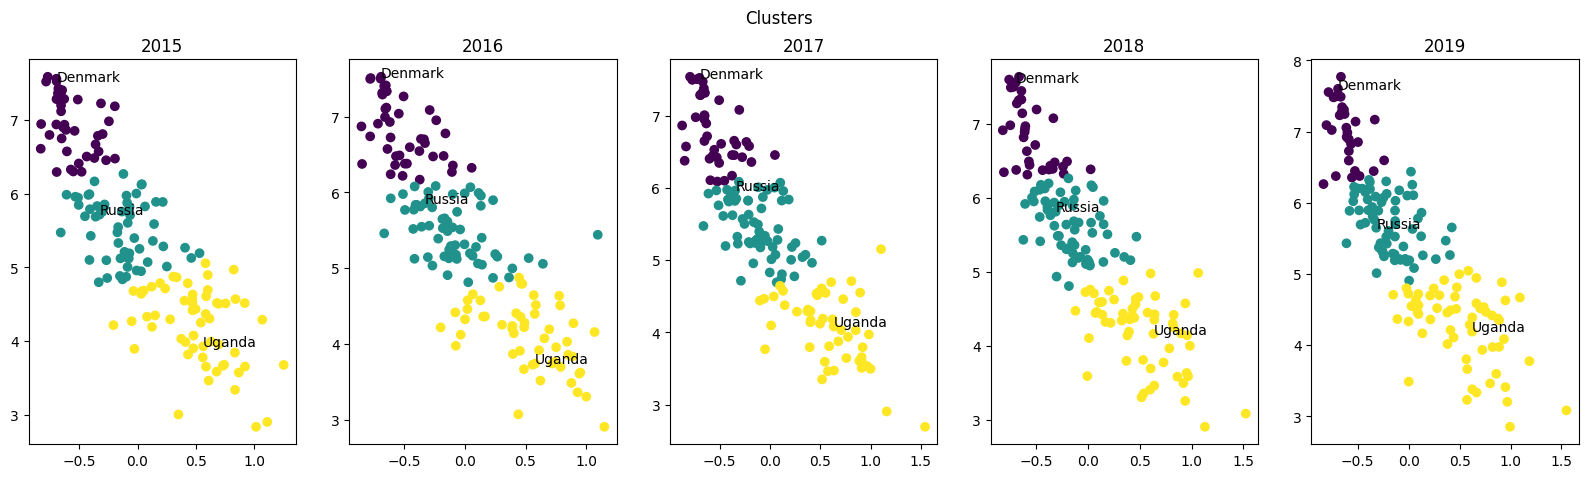

In [53]:
# Adding order to the clusters
data[0].cluster.replace({2: 0, 0: 1, 1: 2}, inplace=True)
data[1].cluster.replace({2: 0, 0: 1, 1: 2}, inplace=True)
data[2].cluster.replace({1: 2, 2: 1}, inplace=True)
data[3].cluster.replace({2: 0, 0: 2}, inplace=True)
data[4].cluster.replace({2: 1, 1: 2}, inplace=True)

fig, axis = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    axis[i].scatter(data[i].pca1, data[i].happiness_score, c=data[i].cluster)
    axis[i].set_title(f'{2015 + i}')
    axis[i].text(data[i].loc[data[i].country == 'Denmark', 'pca1'], 
                 data[i].loc[data[i].country == 'Denmark', 'happiness_score'],
                 'Denmark')
    axis[i].text(data[i].loc[data[i].country == 'Russia', 'pca1'],
                 data[i].loc[data[i].country == 'Russia', 'happiness_score'],
                 'Russia')
    axis[i].text(data[i].loc[data[i].country == 'Uganda', 'pca1'],
                 data[i].loc[data[i].country == 'Uganda', 'happiness_score'],
                 'Uganda')

fig.suptitle('Clusters')
plt.show()


Clusterization seem to work fine. Let's look at correlation between happiness score and pca1 to see if there's any linear correlation

In [56]:
for i in range(5):
    print(2015 + i)
    data[i] = data[i].dropna()
    print(np.corrcoef(data[i].pca1, data[i].happiness_score)[0, 1])

2015
-0.8474952649400418
2016
-0.8512562248051345
2017
-0.86959037941223
2018
-0.8637820218853102
2019
-0.8533114311279497


All coefficients are less than -0.8, so there's negative linear correlation between happiness score and pca1

Let's create a model for each year and test it

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

for i in range(5):
    df = data[i]
    df = df.dropna()
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df[['pca1']], df.happiness_score, test_size=0.2, random_state=0)
    lr.fit(X_train, y_train)
    print(f'{2015 + i} - {lr.score(X_test, y_test)}')

2015 - 0.6421347440993619
2016 - 0.6447485106793198
2017 - 0.7758680950288992
2018 - 0.82919402883163
2019 - 0.6068868469238704


The model is not good enough

As clusters represent the level of development, we better use Logistic Regression to predict the cluster

2015 - 0.75


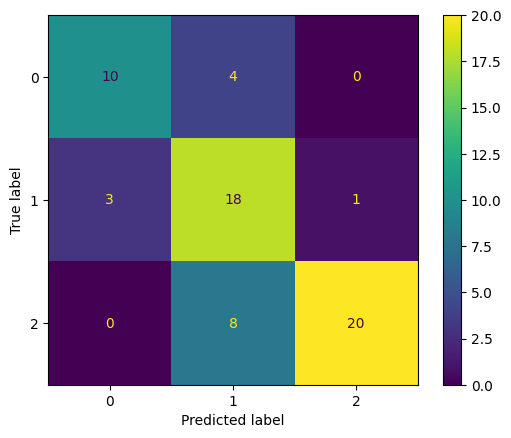

2016 - 0.6984126984126984


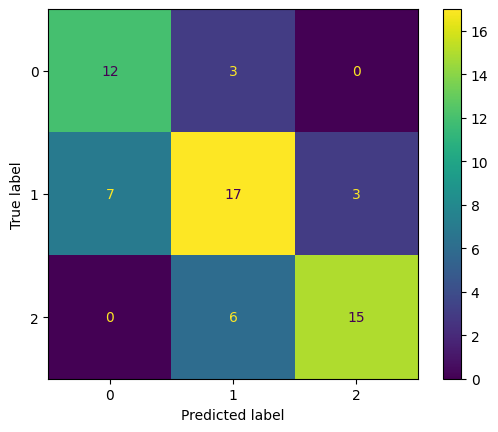

2017 - 0.7741935483870968


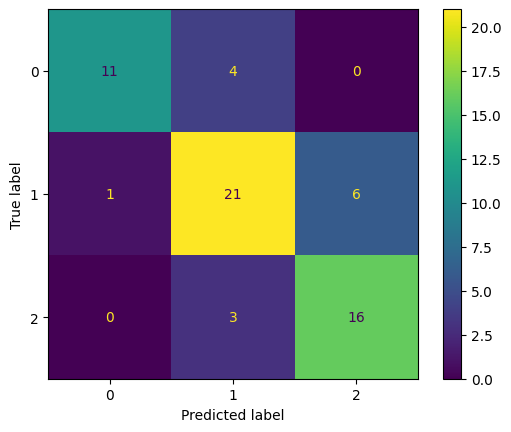

2018 - 0.7419354838709677


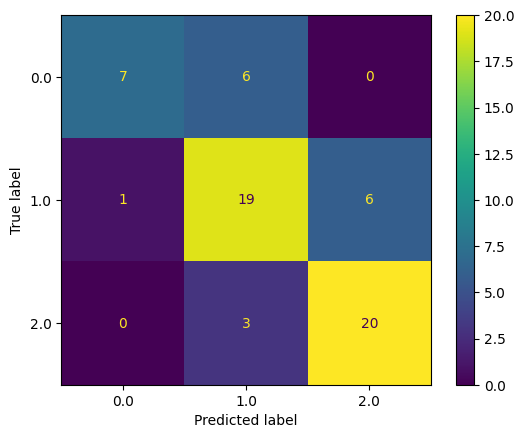

2019 - 0.7936507936507936


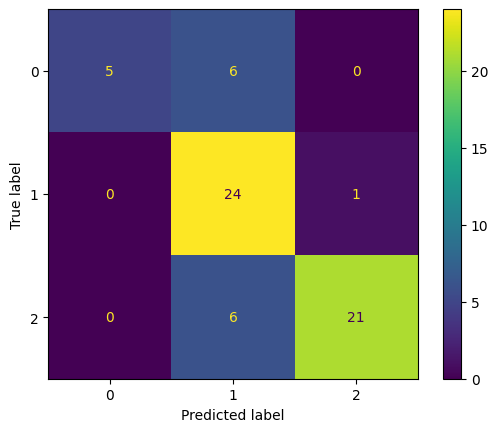

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for i in range(5):
    df = data[i]
    df = df.dropna()
    lr = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(df[['pca1']], df.cluster, test_size=0.4, random_state=0)
    lr.fit(X_train, y_train)
    print(f'{2015 + i} - {lr.score(X_test, y_test)}')
    pred = lr.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()
    plt.show()

Since there's little data and not much of a law in it, the model is not good enough and it easily gets confused